Exercise 2) Explain why AdaBoost.M1 is an ensemble model.
    

In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)

## define csv file to read in the bucket
file_key= 'framingham.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
heart = pd.read_csv(file_content_stream)
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
## removing missing values
heart = heart.dropna()

In [3]:
X = heart[['age', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']]
Y = heart['TenYearCHD']

In [7]:
## creating a list for recall scores
md1_recall_score = list()
md2_recall_score = list()
md3_recall_score = list()

## creating a list for accuracy scores (MAYBE COMBINE SOMEHOW INTO A DATAFRAME??????????)
md1_accuracy_score = list()
md2_accuracy_score = list()
md3_accuracy_score = list()

for i in range(0,100):
    
    print(i)
    
    ## splitting the variables into 80% training and 20% testing, stratifying Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
    
    ## building models (do not have to identify base estimator for Gradient[auto = decision tree])
    md1 = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train, Y_train)
    md2 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 500, learning_rate = 0.01).fit(X_train, Y_train)
    md3 = GradientBoostingClassifier(n_estimators = 500, max_depth = 3, learning_rate = 0.1).fit(X_train, Y_train)
    
    ## predicting on the testing data
    md1_preds = md1.predict_proba(X_test)[:, 1]
    md2_preds = md2.predict_proba(X_test)[:, 1]
    md3_preds = md3.predict_proba(X_test)[:, 1]
    
    ## changing likelihoods to labels, using a 10% cuttoff value
    md1_labels = np.where(md1_preds < 0.1, 0, 1)
    md2_labels = np.where(md2_preds < 0.1, 0, 1)
    md3_labels = np.where(md3_preds < 0.1, 0, 1)
    
    ## calculating the recall score
    md1_recall = recall_score(Y_test, md1_labels)
    md2_recall = recall_score(Y_test, md2_labels)
    md3_recall = recall_score(Y_test, md3_labels)
    
    ## calculating accuracy score
    md1_accuracy = accuracy_score(Y_test, md1_labels)
    md2_accuracy = accuracy_score(Y_test, md2_labels)
    md3_accuracy = accuracy_score(Y_test, md3_labels)
    
    ## appending recall score results to a list
    md1_recall_score.append(md1_recall)
    md2_recall_score.append(md2_recall)
    md3_recall_score.append(md3_recall)
    
    ## appending accuracy score results to a list
    md1_accuracy_score.append(md1_accuracy)
    md2_accuracy_score.append(md2_accuracy)
    md3_accuracy_score.append(md3_accuracy)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
## do i need to identify base estimators for Ada and Gradient Boosting?

In [8]:
## printing average recall scores
print('The average recall score for the Random Forest Model is', np.mean(md1_recall_score))
print('The average recall score for the AdaBoost Model is', np.mean(md2_recall_score))
print('The average recall score for the GradientBoosting Model is', np.mean(md3_recall_score))

The average recall score for the Random Forest Model is 0.8578571428571429
The average recall score for the AdaBoost Model is 0.9916071428571432
The average recall score for the GradientBoosting Model is 0.6361607142857142


In [9]:
## printing average accuracy scores
print('The average accuracy score for the Random Forest Model is', np.mean(md1_accuracy_score))
print('The average accuracy score for the AdaBoost Model is', np.mean(md2_accuracy_score))
print('The average accuracy score for the GradientBoosting Model is', np.mean(md3_accuracy_score))

The average accuracy score for the Random Forest Model is 0.45206284153005455
The average accuracy score for the AdaBoost Model is 0.1573907103825137
The average accuracy score for the GradientBoosting Model is 0.591051912568306


In [7]:
## as recall goes up, precision goes down??

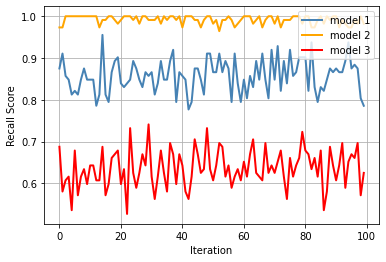

In [10]:
## plotting recall scores
plt.plot(md1_recall_score , linewidth = 2, color = 'steelblue')
plt.plot(md2_recall_score , linewidth = 2, color = 'orange')
plt.plot(md3_recall_score , linewidth = 2, color = 'red')
plt.xlabel('Iteration')
plt.ylabel('Recall Score')
plt.legend(loc = 'upper right', labels = ['model 1', 'model 2', 'model 3'])
plt.grid()
plt.grid
plt.show;

In [ ]:
## plotting accuracy scores
plt.plot(md1_results , linewidth = 2, color = 'steelblue')
plt.plot(md2_results , linewidth = 2, color = 'orange')
plt.plot(md3_results , linewidth = 2, color = 'red')
plt.xlabel('Iteration')
plt.ylabel('Recall Score')
plt.legend(loc = 'upper right', labels = ['model 1', 'model 2', 'model 3'])
plt.grid()
plt.grid
plt.show;

In [ ]:
## to increase accuracy, I woudld reduce the number of trees used to build the mdoels